In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
%matplotlib inline

In [2]:
# Read datas
percentage_people_below_poverty_level = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding="windows-1252")

## Percentage people below poverty level

In [3]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [4]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [5]:
# Remove '-' in poverty_rate so we can convert it to type Float
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

In [6]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [7]:
# Create data frame with sum of area poverty for each state
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []

for index in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area'] == index]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})

In [8]:
data.sort_values(by='area_poverty_ratio', ascending=False, inplace=True)

Text(0.5,1,'Poverty Rate Given States')

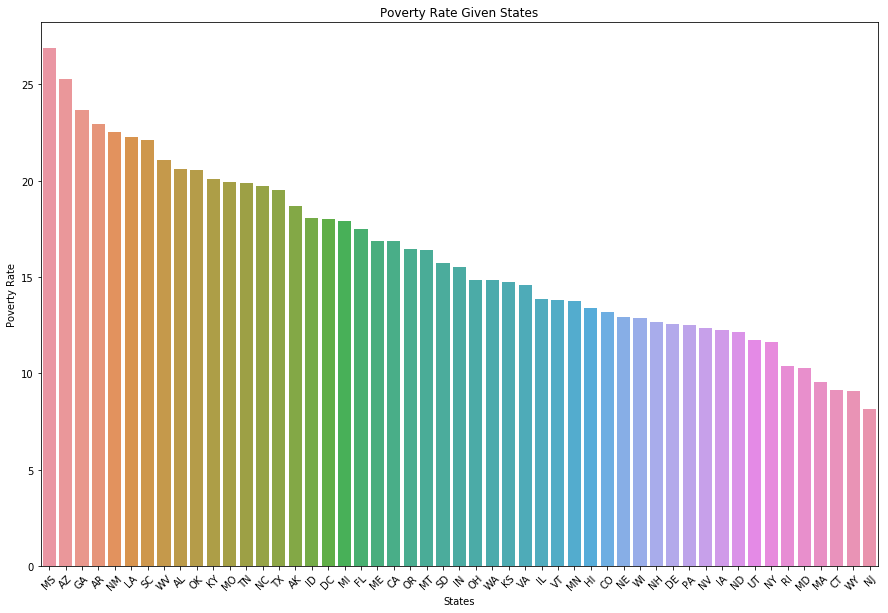

In [9]:
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x='area_list', y='area_poverty_ratio', data=data)
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

From this chart above, we can observe that MS, AZ, and GA are the 3 states that have the highest poverty rate. On the other hand, NJ, WY, and CT have the lowest poverty rate

## Percent over 25 completed highschool

In [10]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [11]:
# High school graduation rate of the population that is older than 25 in states
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)

In [12]:
completed_highschool_area_list = percent_over_25_completed_highSchool['Geographic Area'].unique().tolist()

In [13]:
# Just make sure there are 51 states
len(completed_highschool_area_list)

51

In [14]:
# Create data frame for each state
total_percent_completed_hs = []
for index in completed_highschool_area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area'] == index]
    percentage = sum(x.percent_completed_hs) / len(x.percent_completed_hs)
    total_percent_completed_hs.append(percentage)

In [15]:
percent_completed_hs_new_data = pd.DataFrame({'area_list': completed_highschool_area_list, 'percent_completed_hs': total_percent_completed_hs })

In [16]:
percent_completed_hs_new_data.sort_values(by='percent_completed_hs', inplace= True)

Text(0.5,1,"Percentage of Given State's Population Above 25 that Has Graduated High School")

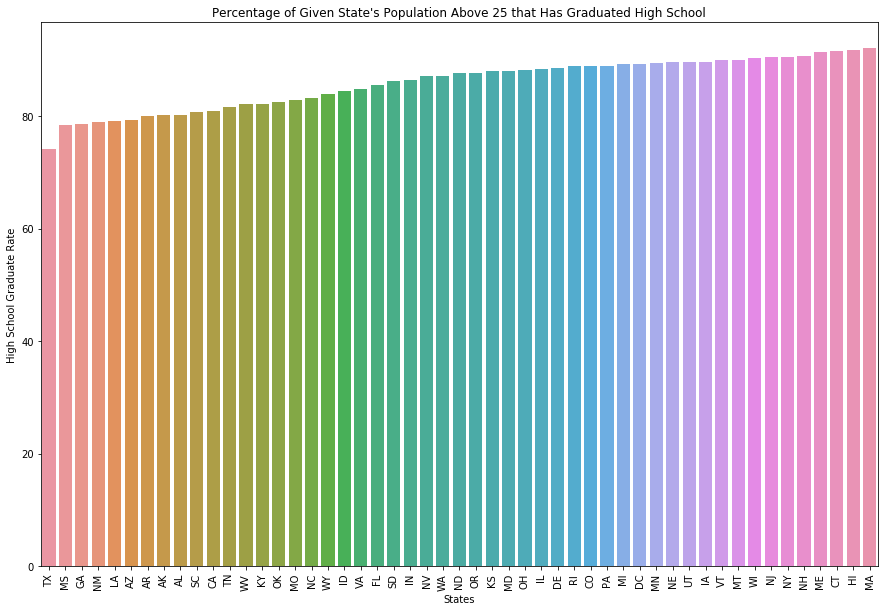

In [17]:
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x='area_list', y='percent_completed_hs', data = percent_completed_hs_new_data)
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

From this chart above, we can observe that TX, MS, and GA are the 3 states that have lowest highchool completed rate. On the other hand, MA, HI, and CT have the lowest poverty rate

In [18]:
data.head()

,area_list,area_poverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675


In [19]:
percent_completed_hs_new_data.head()

,area_list,percent_completed_hs
43,TX,74.086949
24,MS,78.470718
10,GA,78.634450
31,NM,78.971783
18,LA,79.122363


In [20]:
combined_poverty_completed_hs_data = pd.merge(data, percent_completed_hs_new_data, on='area_list', how='inner')

In [21]:
combined_poverty_completed_hs_data.head()

,area_list,area_poverty_ratio,percent_completed_hs
0,MS,26.884254,78.470718
1,AZ,25.268071,79.218182
2,GA,23.663636,78.634450
3,AR,22.963216,79.949538
4,NM,22.507675,78.971783


In [22]:
max_poverty_ratio = max(combined_poverty_completed_hs_data.area_poverty_ratio)
max_completed_hs_ratio = max(combined_poverty_completed_hs_data.percent_completed_hs)
combined_poverty_completed_hs_data['area_poverty_percentage'] = combined_poverty_completed_hs_data.area_poverty_ratio.apply(lambda x: x / max_poverty_ratio)
combined_poverty_completed_hs_data['completed_hs_percentage'] = combined_poverty_completed_hs_data.percent_completed_hs.apply(lambda x: x / max_completed_hs_ratio) 

In [23]:
combined_poverty_completed_hs_data.head()

,area_list,area_poverty_ratio,percent_completed_hs,area_poverty_percentage,completed_hs_percentage
0,MS,26.884254,78.470718,1.000000,0.852679
1,AZ,25.268071,79.218182,0.939884,0.860801
2,GA,23.663636,78.634450,0.880204,0.854458
3,AR,22.963216,79.949538,0.854151,0.868748
4,NM,22.507675,78.971783,0.837207,0.858124


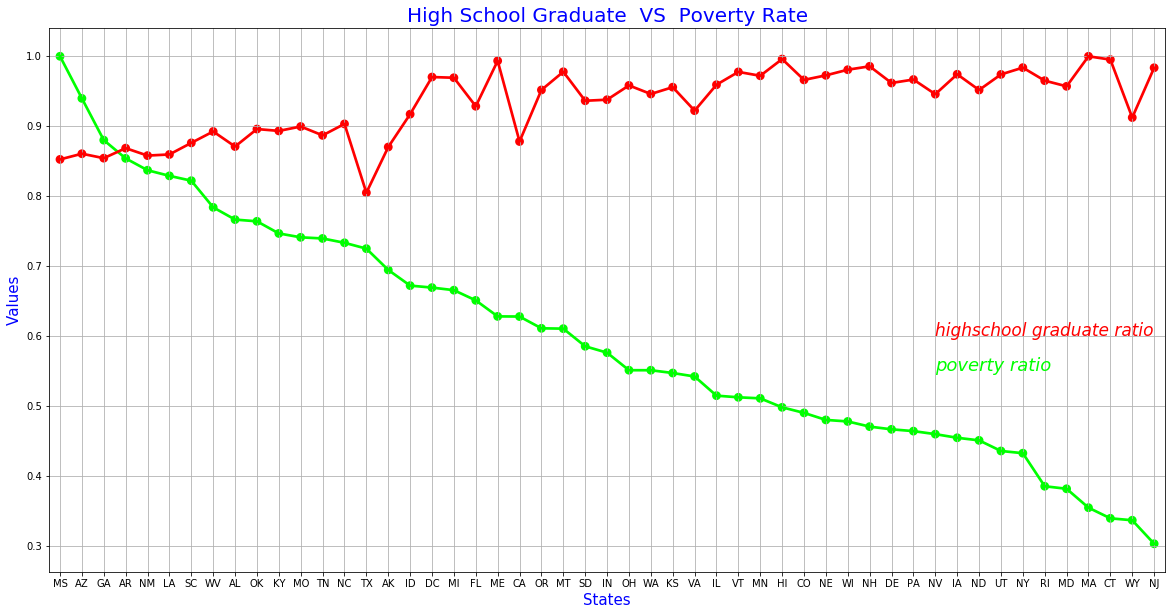

In [24]:
# visualize
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='area_list',y='area_poverty_percentage',data=combined_poverty_completed_hs_data,color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='completed_hs_percentage',data=combined_poverty_completed_hs_data,color='red',alpha=0.8)
plt.text(40,0.6,'highschool graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()

As we can see, there is a relationship between poverty rate and highschool graduate rate. State, which has high poverty rate, tends to have low highschool graduate rate and vice versa. We can say they have a fairly strong negative relationship

In [25]:
# Let check the corr and some more charts
combined_poverty_completed_hs_data.drop(['area_poverty_ratio','percent_completed_hs'], axis= 1).corr()

,area_poverty_percentage,completed_hs_percentage
area_poverty_percentage,1.000000,-0.805761
completed_hs_percentage,-0.805761,1.000000


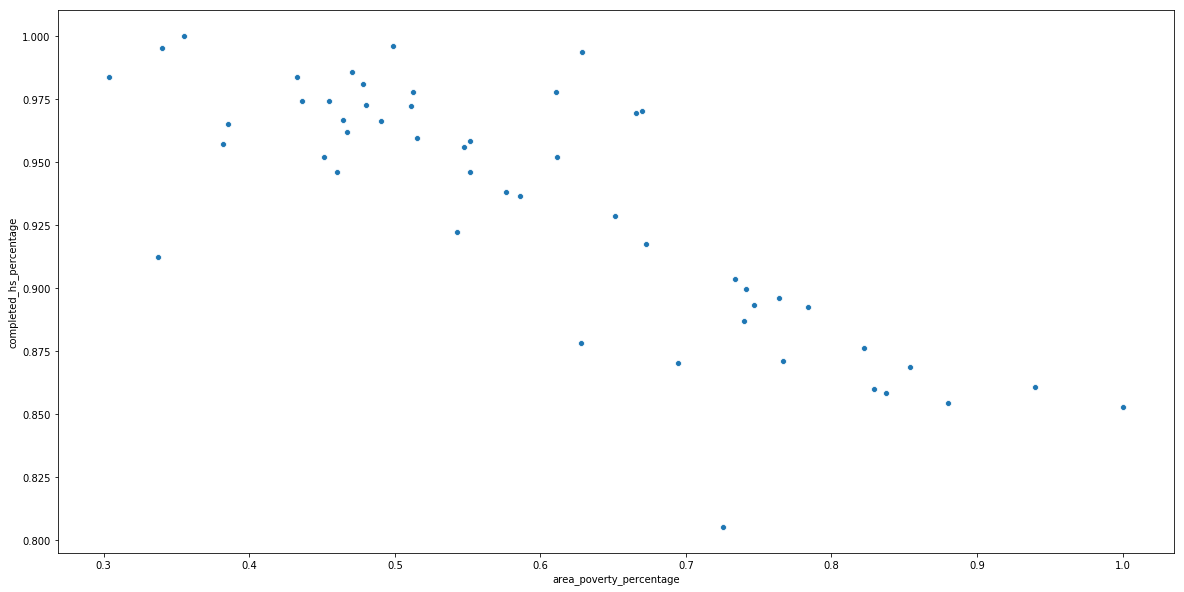

In [26]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.scatterplot(x= 'area_poverty_percentage', y = 'completed_hs_percentage', data= combined_poverty_completed_hs_data)

C:\Users\KayToBe\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\KayToBe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


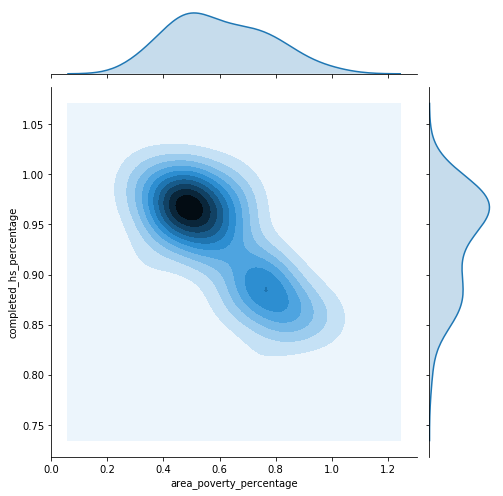

In [27]:
g = sns.jointplot(x= 'area_poverty_percentage', y = 'completed_hs_percentage', data= combined_poverty_completed_hs_data, kind="kde", size=7)
plt.savefig('graph.png')
plt.show()

C:\Users\KayToBe\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\KayToBe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


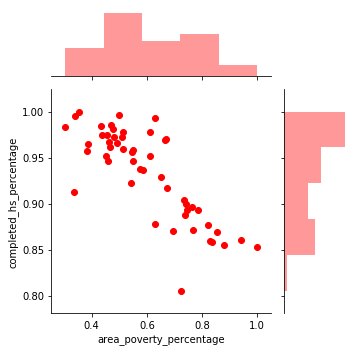

In [28]:
g = sns.jointplot(x= 'area_poverty_percentage', y = 'completed_hs_percentage', data= combined_poverty_completed_hs_data,size=5, ratio=3, color="r")